## IMHOTEP: Amazon+Orinoco Runoffs timeseries and trends
Runoffs timeseries from the freshwater runoff forcing of IMHOTEP experiment (NEMO).

1. Load data
2. Plot a subregion corresponding to Mexican Gulf + Amazon mouth
3. Plot timeseries and trend of Runoffs in the Amazon and Orinoco mouths (+saved them)

### Import modules

In [1]:
## standard libraries
import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

import cartopy.feature as cfeature


# custom tools for plotting
sys.path.append('./')
from libimhotep import libSLXtoolsIMHOTEP as li


import cmocean

# for jupyter notebook display
%matplotlib inline

import pkg_resources


import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'hatch.color': '#086A87'})

# list packages to be checked
root_packages = [
     'numpy', 
    'matplotlib', 'cartopy', 'cmocean']

# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

Name: libimhotep.libSLXtoolsIMHOTEP
Package: libimhotep
This is a collection of  tools i often use when analysing the IMHOTEP project data.
numpy==1.20.0
matplotlib==3.3.4
cmocean==2.0
Cartopy==0.18.0


In [2]:
prefix = "eORCA025.L75-IMHOTEP"

# NAME of ENSEMBLE EXPERIMENT:
# "EGAI": all runoffs varying
# "ES": all runoffs climatological
nexp = "EGAI"

varnasss = 'sosaline'

# ensemble size
NE=10

# years to read data from:
y1='1980'
y2='2018'

fo="1y" # output frequency

# input directory on work for grid info
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"

# plot directory
diro="/gpfswork/rech/cli/regi915/PLT/dec2022/"+fo+"/"

# data output directory
dirdat="/gpfswork/rech/cli/regi915/DAT/"


### **1. Load data**

* Find directory and file list

In [3]:
# Runoffs directory
diridat = li.Ffindinputdata(nexp,prefix=prefix)

#  Runoffs file list
rnffiles = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="flxT")
print(rnffiles)
varnarnf = 'sornf'

/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.EGAI.001-S/1y/????/eORCA025.L75-IMHOTEP.EGAI*flxT.nc


* Load data

In [4]:
# select the imhov instance you want to load : RNF
RNF1 = li.imhov(rnffiles, varnarnf,nexp,fo,y1,y2,diff=False,dirigrid=diri)

# load the data in this imhov instance
RNF1.loaddata()

# load grid info
RNF1.loadgridinfo()

# convert kg.m2 of freshwwater per second into m3/s
RNF1.convertRNF()

# detrend your data
RNF1.detrend()

### **2. Plot a subregion corresponding to Mexican Gulf + Amazon mouth**

* Choose your subregion using lat and lon coordinates

In [5]:
# latitude and longitude values you want to select the region over
lonselect=[-100,-40]
latselect=[-5,31]

* Few data needed to plot as function of lat and lon

In [6]:
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon']   
mask = xr.open_dataset(dirigrid+'mesh_hgr.nc')['tmask'][0,0,:,:]

In [7]:
# predifined region over which to plot:  'GLO' 'gro' 'atl' 'tropatl' 'asia' 'ind' 'bof'
# 'GLO' for global plot
reg='atl'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)

pltcolparam = li.Fpltsetcolorsdefaults('TM')
pltcolparam['levbounds']=[0,8100,100]
#pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.0f'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)
# [minlon, maxlon, minlat, maxlat]
pltgridparam['axextent']=[lonselect[0],lonselect[1],latselect[0],latselect[1]]
pltgridparam['minlat']=pltgridparam['axextent'][2]
pltgridparam['minlat']=pltgridparam['axextent'][3]
pltgridparam['incrgridlat']=10
pltgridparam['incrgridlon']=10
print('- pltgridparam')
print(pltgridparam)


- pltgridparam
{'reg': 'atl', 'gridl': False, 'incrgridlon': 10, 'incrgridlat': 10, 'sath': 35785831, 'minlat': 31, 'maxlat': 35, 'minlon': -180, 'maxlon': 180, 'loncentr': -35, 'latcentr': 10, 'axextent': [-100, -40, -5, 31]}


* Prepare data to plot by masking land grid cells

In [8]:
data2plot = RNF1.data.mean(dim='time_counter').compute()

In [9]:
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

* Plot

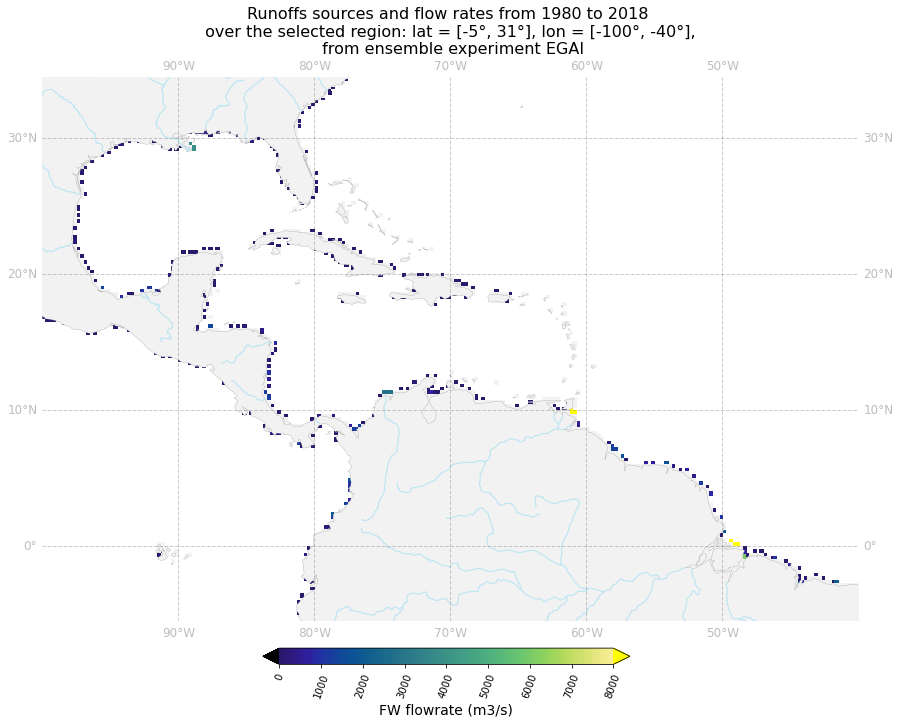

In [10]:
# name of the file in case you want to save it 
namo='RNF_REG2_'+nexp+'_1980-2018'
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/Runoffs/"

#========= CREATE FIGURE
fig1 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION DEPENDING ON IF TARGET IS GLOBAL MAP OR REGIONAL MAP
if (reg=='GLO'):
        ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))
else:
        ax = plt.axes(projection= ccrs.PlateCarree(central_longitude=pltgridparam['loncentr']))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= SET FRAME AND GEOGRAPHICAL PLOT EXTENT
if (reg=='GLO'):
        li.Fnospines(ax)
else:
        # geographical limits
        ax.set_extent([pltgridparam['axextent'][0],pltgridparam['axextent'][1],pltgridparam['axextent'][2],pltgridparam['axextent'][3]])
        # remove spines from around plot
        li.Fnospines(ax)

#========= ADD COLORBAR
cb = li.Faddcolorbar(fig1,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel='FW flowrate (m3/s)',facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.18,-0.25,0.9,0.2))  

#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Runoffs sources and flow rates from 1980 to 2018 \n over the selected region: lat = ['+str(latselect[0])+'°, '+str(latselect[1])+'°], lon = ['+str(lonselect[0])+'°, '+str(lonselect[1])+'°], \n from ensemble experiment '+nexp,fontsize=16)


plt.show()

# Save fig in png, resolution dpi    
#li.Fsaveplt(fig1,diro,namo,dpifig=300)

* Select only Orinoco and Amazon mouth

In [11]:
# latitude and longitude values you want to select the region over
lonselect=[-65,-40]
latselect=[-5,15]

* Few data needed to plot as function of lat and lon

In [12]:
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon']   
mask = xr.open_dataset(dirigrid+'mesh_hgr.nc')['tmask'][0,0,:,:]

In [13]:
# predifined region over which to plot:  'GLO' 'gro' 'atl' 'tropatl' 'asia' 'ind' 'bof'
# 'GLO' for global plot
reg='atl'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)

pltcolparam = li.Fpltsetcolorsdefaults('TM')
pltcolparam['levbounds']=[0,9100,100]
#pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.0f'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)
# [minlon, maxlon, minlat, maxlat]
pltgridparam['axextent']=[lonselect[0],lonselect[1],latselect[0],latselect[1]]
pltgridparam['minlat']=pltgridparam['axextent'][2]
pltgridparam['minlat']=pltgridparam['axextent'][3]
pltgridparam['incrgridlat']=10
pltgridparam['incrgridlon']=10
print('- pltgridparam')
print(pltgridparam)

- pltgridparam
{'reg': 'atl', 'gridl': False, 'incrgridlon': 10, 'incrgridlat': 10, 'sath': 35785831, 'minlat': 15, 'maxlat': 35, 'minlon': -180, 'maxlon': 180, 'loncentr': -35, 'latcentr': 10, 'axextent': [-65, -40, -5, 15]}


* Prepare data to plot by masking land grid cells

In [14]:
data2plot = RNF1.data.mean(dim='time_counter').compute()

In [15]:
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

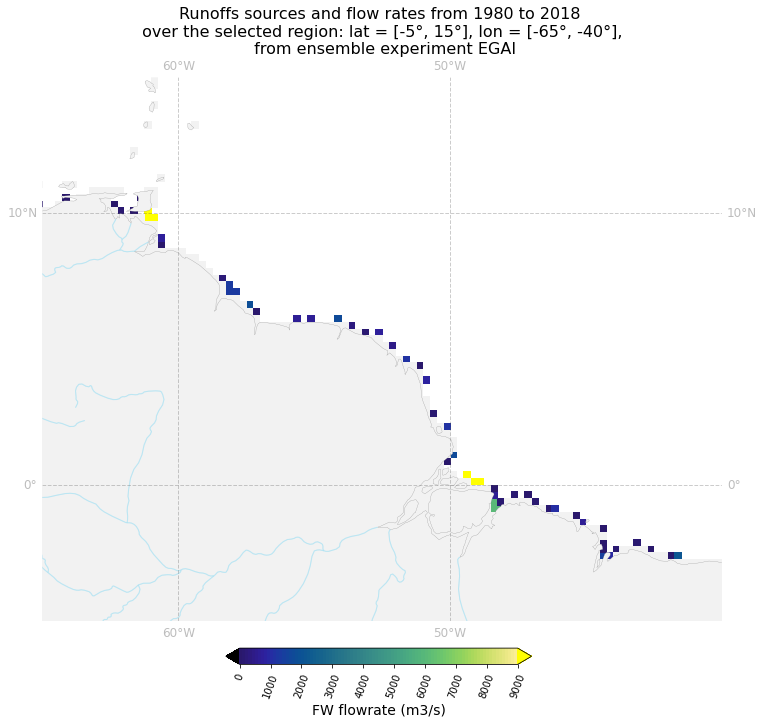

In [16]:
# name of the file in case you want to save it 
namo='RNF_REG2AO_'+nexp+'_1980-2018'
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/Runoffs/"

#========= CREATE FIGURE
fig2 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION DEPENDING ON IF TARGET IS GLOBAL MAP OR REGIONAL MAP
if (reg=='GLO'):
        ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))
else:
        ax = plt.axes(projection= ccrs.PlateCarree(central_longitude=pltgridparam['loncentr']))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= SET FRAME AND GEOGRAPHICAL PLOT EXTENT
if (reg=='GLO'):
        li.Fnospines(ax)
else:
        # geographical limits
        ax.set_extent([pltgridparam['axextent'][0],pltgridparam['axextent'][1],pltgridparam['axextent'][2],pltgridparam['axextent'][3]])
        # remove spines from around plot
        li.Fnospines(ax)

#========= ADD COLORBAR
cb = li.Faddcolorbar(fig2,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel='FW flowrate (m3/s)',facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.18,-0.25,0.9,0.2))  

#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Runoffs sources and flow rates from 1980 to 2018 \n over the selected region: lat = ['+str(latselect[0])+'°, '+str(latselect[1])+'°], lon = ['+str(lonselect[0])+'°, '+str(lonselect[1])+'°], \n from ensemble experiment '+nexp,fontsize=16)


plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig2,diro,namo,dpifig=300)

### **3. Plot timeseries and trend of Runoffs in the Amazon and Orinoco mouths**

* Select subregion of the Amazon mouth

In [17]:
# latitude and longitude values you want to select the region over
lonselect=[-50.8,-47.8]
latselect=[-2,2]

# Find x and y (xselect, yselect) indices you want to select the region over.
for p in range(2):
    # Finds (i,j) = (x,y) coordinates nearest to latitude and longitude values
    [i,j] = li.Ffindij(dirigrid, lonselect[p], latselect[p])
    if p==0:
        xi=i
        yi=j
    else:
        xj=i
        yj=j
        
xselect =[xi,xj]
yselect =[yi,yj]

print(xselect)
print(yselect)

[946, 958]
[676, 692]


* Quick plot to check

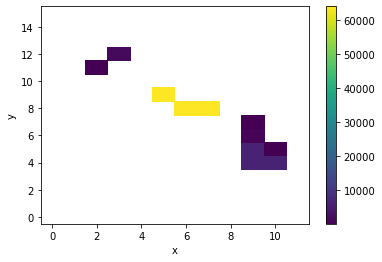

In [18]:
rnfselmap = RNF1.data.isel(x=slice(xselect[0],xselect[1]),y=slice(yselect[0],yselect[1])).squeeze() 
rnf_dtselmap = RNF1.data_dt.isel(x=slice(xselect[0],xselect[1]),y=slice(yselect[0],yselect[1])).squeeze()

Amouth = rnfselmap.where(rnfselmap>0).squeeze()
Amouth_dt = rnf_dtselmap.where(rnfselmap>0).squeeze()
Amouth.mean(dim='time_counter').plot()

* Sum up runoffs in the Amazon mouth

In [19]:
stacked_data = Amouth.stack(z=("x", "y"))
tsAmouth = stacked_data.sum(dim='z')

In [20]:
#same for the detrending data
stacked_data = Amouth_dt.stack(z=("x", "y"))
tsAmouth_dt = stacked_data.sum(dim='z')

In [21]:
# Deduce trend
tsAmouth_tr = tsAmouth-tsAmouth_dt

* Save timeseries and Trend in NetCDF4 file 

In [22]:
# convert DataArray to Dataset
dataset_tsAmouth= tsAmouth.to_dataset(name='dataset_tsAmouth',promote_attrs=True)

dataset_tsAmouth_tr= tsAmouth_tr.to_dataset(name='dataset_tsAmouth_tr',promote_attrs=True)

In [23]:
#================== save the runoff timeserie

# directory where you want tu save your files 
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Data/Runoffs_ncfiles/"

# name of the saved file
namets="TS_Am_"+RNF1.nexp+"_"+RNF1.y1+"-"+RNF1.y2+".nc"

# Save the dataset containing the timeserie in a NetCDF4 file
dataset_tsAmouth.to_netcdf(diro+namets,mode='w',format='NETCDF4')
            

In [24]:
#=================== save the trend

# directory where you want tu save your files 
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Data/Runoffs_ncfiles/"

# name of the saved file
nametr="TR_Am_"+RNF1.nexp+"_"+RNF1.y1+"-"+RNF1.y2+".nc"

# Save the dataset containing the timeserie in a NetCDF4 file
dataset_tsAmouth_tr.to_netcdf(diro+nametr,mode='w',format='NETCDF4')

* Plot timeseries and trend

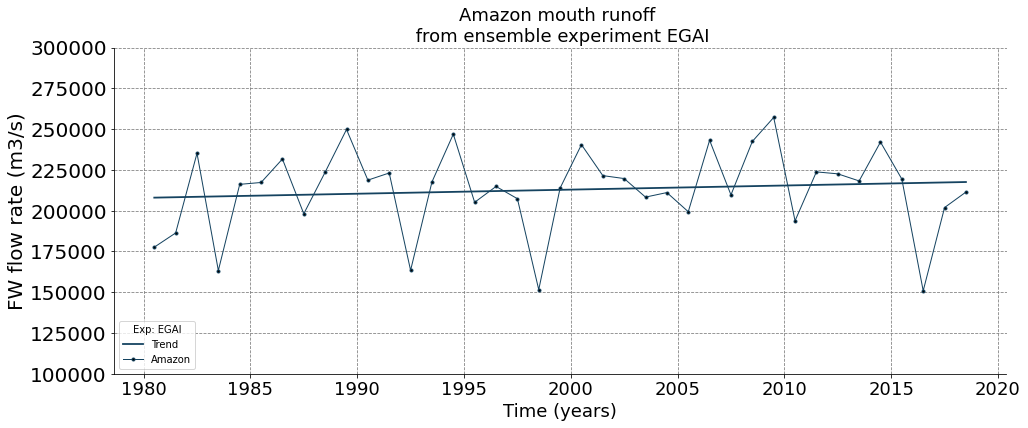

In [25]:
# name of the file in case you want to save it 
namo="ts_Amouth-RNF_"+nexp+"_1980-2018"
gp = 0

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/Runoffs/"

# plot timeseries
fig3 = plt.figure(figsize=([16,6]),facecolor='white')  

# colors
c1="#154360"
c2= "#e74c3c"


#plot of the data: Runoff before detrending
tsAmouth.plot(linewidth=1,color=c1,marker='.',markerfacecolor='k', label='Amazon')

# plot of the data: Runoff after detrending
tsAmouth_tr.plot(linewidth=1.8,color=c1,label= 'Trend' )

# now customize plot
ax = plt.gca()    

# plot grid
ax.grid(which='both', color='grey', linestyle='--')

# Choose which  lines of the plot frame will appear.  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

# axis label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

# decide if axis ticks are inside or outside plot frame
ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')

# add legend and choose where it will appear
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Exp: '+nexp, loc='lower left')

# rotate ticks with an angle
plt.xticks(rotation=0, ha='center',va="top")

# axis labels
plt.xlabel("Time (years)")
plt.ylabel("FW flow rate (m3/s)")

# set the limits of the plot on y axis
plt.ylim(100000,300000)

# plot title

plt.title('Amazon mouth runoff \n from ensemble experiment '+nexp,fontsize=18)
#plt.legend()

plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig3,diro,namo,dpifig=300)

In [27]:
#=======================================================OPTIONAL : if you want to plot from a saved timeserie in a netCDF4 file

# directory where your file is saved
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Data/Runoffs_ncfiles/"

filo="TS_Am_"+nexp+"_1980-2018.nc"
namo="TR2plt_"+nexp+"_1980-2018.nc"

# open netcdf file (Dataset) cointaining the timeserie 
dataset_tsAmouth = xr.open_dataset(diro+filo,decode_times=True)
    
# convert Dataset to array
tsAmouth = dataset_tsAmouth.to_array(dim ='runoffs',name=None )
    
# We want to plot the trend:
data2plot = tsAmouth

### Note: 
_From wikipedia, the mean runoffs of  Amazon was around 209 000 m3/s over the period between 1973-1990._

* Select subregion of the Orinoco mouth




In [28]:
# latitude and longitude values you want to select the region over
lonselect=[-63,-60]
latselect=[8,11]

# Find x and y (xselect, yselect) indices you want to select the region over.
for p in range(2):
    # Finds (i,j) = (x,y) coordinates nearest to latitude and longitude values
    [i,j] = li.Ffindij(dirigrid, lonselect[p], latselect[p])
    if p==0:
        xi=i
        yi=j
    else:
        xj=i
        yj=j
        
xselect =[xi,xj]
yselect =[yi,yj]

print(xselect)
print(yselect)

[897, 909]
[716, 728]


* Quick plot to check



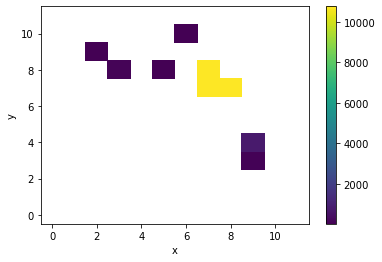

In [29]:
rnfselmap = RNF1.data.isel(x=slice(xselect[0],xselect[1]),y=slice(yselect[0],yselect[1])).squeeze() 
rnf_dtselmap = RNF1.data_dt.isel(x=slice(xselect[0],xselect[1]),y=slice(yselect[0],yselect[1])).squeeze()

Omouth = rnfselmap.where(rnfselmap>0).squeeze()
Omouth_dt = rnf_dtselmap.where(rnfselmap>0).squeeze()
Omouth.mean(dim='time_counter').plot()

* Sum up runoffs in the Orinoco mouth



In [30]:
stacked_data = Omouth.stack(z=("x", "y"))
tsOmouth = stacked_data.sum(dim='z')

In [31]:
#same for the detrending data
stacked_data = Omouth_dt.stack(z=("x", "y"))
tsOmouth_dt = stacked_data.sum(dim='z')

In [32]:
# Deduce trend
tsOmouth_tr = tsOmouth-tsOmouth_dt

* Save timeseries and Trend in NetCDF4 file

In [33]:
# convert DataArray to Dataset
dataset_tsOmouth= tsOmouth.to_dataset(name='dataset_tsOmouth',promote_attrs=True)

dataset_tsOmouth_tr= tsOmouth_tr.to_dataset(name='dataset_tsOmouth_tr',promote_attrs=True)

In [34]:
#================== save the runoff timeserie

# directory where you want tu save your files 
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Data/Runoffs_ncfiles/"

# name of the saved file
namets="TS_Om_"+RNF1.nexp+"_"+RNF1.y1+"-"+RNF1.y2+".nc"

# Save the dataset containing the timeserie in a NetCDF4 file
dataset_tsOmouth.to_netcdf(diro+namets,mode='w',format='NETCDF4')
            

In [35]:
#=================== save the trend

# directory where you want tu save your files 
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Data/Runoffs_ncfiles/"

# name of the saved file
nametr="TR_Om_"+RNF1.nexp+"_"+RNF1.y1+"-"+RNF1.y2+".nc"

# Save the dataset containing the timeserie in a NetCDF4 file
dataset_tsOmouth_tr.to_netcdf(diro+nametr,mode='w',format='NETCDF4')

* Plot timeseries

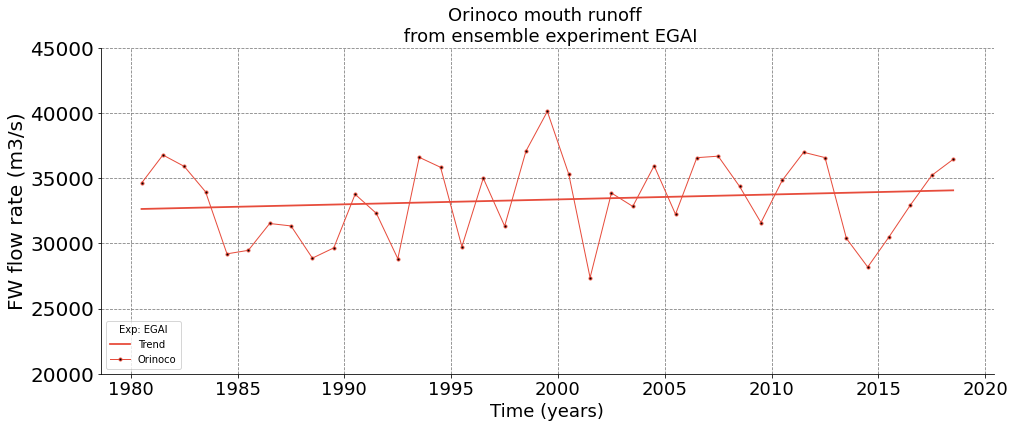

In [36]:
# name of the file in case you want to save it
namo="ts_Omouth-RNF_"+nexp+"_1980-2018"
gp = 0

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/Runoffs/"

# plot timeseries
fig4 = plt.figure(figsize=([16,6]),facecolor='white')  

c1="#154360"
c2= "#e74c3c"

#plot of the data: Runoff before detrending
tsOmouth.plot(linewidth=1,color=c2,marker='.',markerfacecolor='k', label='Orinoco')

# plot of the data: Runoff after detrending
tsOmouth_tr.plot(linewidth=1.8,color=c2,label= 'Trend' )

# now customize plot
ax = plt.gca()    

# plot grid
ax.grid(which='both', color='grey', linestyle='--')

# Choose which  lines of the plot frame will appear.  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

# axis label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

# decide if axis ticks are inside or outside plot frame
ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')

# add legend and choose where it will appear
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Exp: '+nexp, loc='lower left')

# rotate ticks with an angle
plt.xticks(rotation=0, ha='center',va="top")

# axis labels
plt.xlabel("Time (years)")
plt.ylabel("FW flow rate (m3/s)")

# set the limits of the plot on y axis
plt.ylim(20000,45000)

# plot title

plt.title('Orinoco mouth runoff \n from ensemble experiment '+nexp,fontsize=18)
#plt.legend()

plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig4,diro,namo,dpifig=300)

### Note: 
_From wikipedia, the mean runoff of  Orinoco is around 33 000 m3/s._

* Plot all rivers together

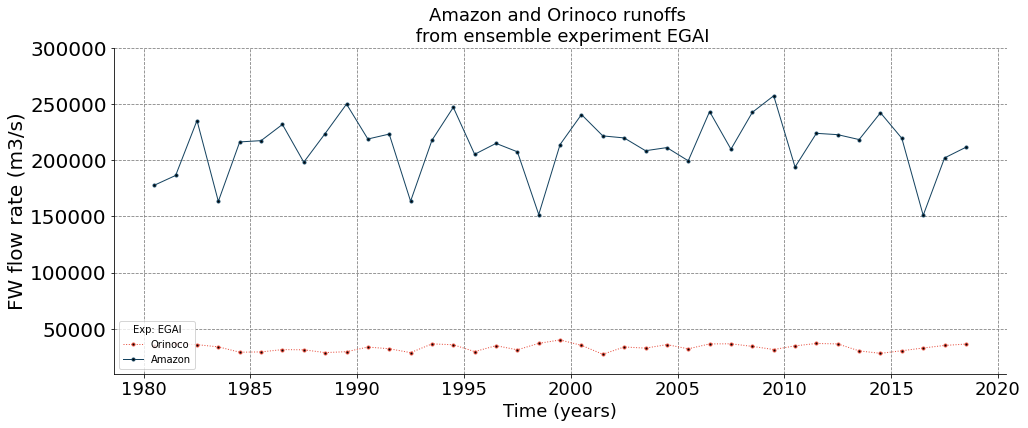

In [37]:
# name of the file in case you want to save it
namo="ts_AOM-RNF_"+nexp+"_1980-2018"
gp = 0

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/Runoffs/"

# plot timeseries
fig5 = plt.figure(figsize=([16,6]),facecolor='white')  

#plot of the data: Runoff before detrending
tsAmouth.plot(linewidth=1,color=c1,marker='.',markerfacecolor='k',label='Amazon')
tsOmouth.plot(linewidth=1,color=c2,linestyle=':',marker='.',markerfacecolor='k',label='Orinoco')

# plot of the data: Runoff after detrending
#tsAmouth_tr.plot(color='b',label= 'Trend' )
#tsOmouth_tr.plot(color='b',label= 'Trend' )

# now customize plot
ax = plt.gca()    

# plot grid
ax.grid(which='both', color='grey', linestyle='--')

# Choose which  lines of the plot frame will appear.  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

# axis label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

# decide if axis ticks are inside or outside plot frame
ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')

# add legend and choose where it will appear
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Exp: '+nexp, loc='lower left')

# rotate ticks with an angle
plt.xticks(rotation=0, ha='center',va="top")

# axis labels
plt.xlabel("Time (years)")
plt.ylabel("FW flow rate (m3/s)")

# set the limits of the plot on y axis
plt.ylim(10000,300000)

# plot title
plt.title('Amazon and Orinoco runoffs \n from ensemble experiment '+nexp,fontsize=18)

plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig5,diro,namo,dpifig=300)